imports

In [1]:
# %% Imports -----------------------------------------------------------
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.impute import KNNImputer

from statsmodels.stats.outliers_influence import variance_inflation_factor

import sys
sys.path.insert(0, "../src")   # keep original relative module path
import SCORE_functions as sf     # project‑specific helpers stay the same

load data:

In [2]:
# import phase2 data
path_alltextdatatopreprocessing = "../data/alltextdatatopreprocessing.xlsx"
dataset = pd.read_excel(path_alltextdatatopreprocessing)

investigate

In [3]:
# display df2
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
dataset.head(2)

,code,text,sco2 - 1.1. Trust & engagement in local institutions,sco2 - 1.2. Responsiveness,sco2 - 2.1. Community decision-making influence,sco2 - 2.2. General consideration about civic life,sco2 - 2.3. Community accessibility to resources (Participation),sco2 - 2.4. Inclusion/exclusion,sco2 - 3.1. Collective identification,sco2 - 3.2. Role of key influencers,sco2 - 4.1. Economic security,sco2 - 4.2. Community accessibility to resources (Economy),sco2 - 4.3. Perception of social threat,sco2 - 5.1. Social distance,sco2 - 5.2. Networking and horizontal communication,sco2 - 6.1. Formal mechanisms to integrate different stakeholders,sco2 - 6.2. Informal mechanisms to integrate different stakeholders,sco2 - Responsibility & accountability,sco2 - Participation,sco2 - Community definition and identity,"sco2 - Economy, safety, and security",sco2 - Community distance,sco2 - Formal and informal integration,sco2 - Actor's relevance
0,MT00001,An international organization with license num...,3.0,3.0,1.0,3,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,3.0,2.5,3.0,3.0,2.5,1.0,2.5
1,MT00001,"""The organization responded to the services an...",3.0,3.0,1.0,3,3.0,3,3.0,3.0,3.0,3.0,3.0,3.0,2.0,0.0,2.0,3.0,2.5,3.0,3.0,2.5,1.0,2.5


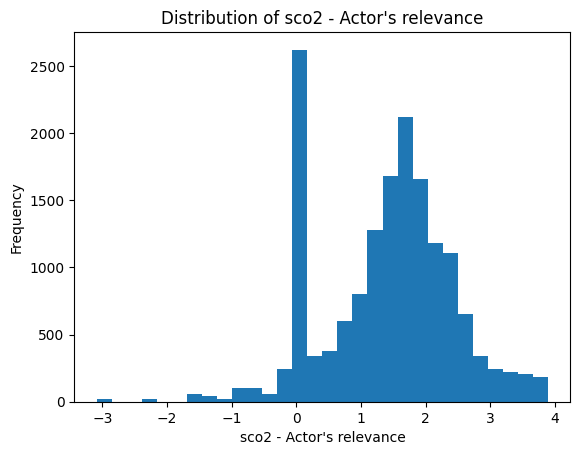

In [4]:
plt.hist(dataset["sco2 - Actor's relevance"], bins=30)
plt.xlabel("sco2 - Actor's relevance")
plt.ylabel('Frequency')
plt.title("Distribution of sco2 - Actor's relevance")
plt.show()

- the data has a normal distribution
- 0 is inflated so it has to be inspected.
- values of target aren't much so it is not so continuous, we will investigate the score values to determine that it is a regression problem or classification of multiclass.

In [5]:
# inspect values of target
print(dataset["sco2 - Actor's relevance"].value_counts().sort_index())

sco2 - Actor's relevance
-3.083333      20
-2.319444      20
-1.680556      20
-1.555556      20
-1.500000      20
-1.375000      20
-1.333333      20
-1.152778      20
-0.916667      20
-0.875000      20
-0.847222      20
-0.833333      20
-0.791667      20
-0.708333      20
-0.625000      20
-0.597222      20
-0.583333      40
-0.458333      20
-0.375000      20
-0.333333      20
-0.236111      40
-0.222222      20
-0.194444      20
-0.166667      20
-0.111111      20
-0.083333     120
-0.041667      39
 0.000000    2361
 0.013889      20
 0.041667      21
 0.083333      60
 0.111111      20
 0.166667     100
 0.194444      20
 0.222222      20
 0.236111      20
 0.250000      20
 0.263889      40
 0.291667      20
 0.333333      60
 0.347222      20
 0.361111      20
 0.375000      80
 0.388889      20
 0.458333      20
 0.500000     120
 0.527778      20
 0.541667      80
 0.583333      80
 0.625000      60
 0.666667      40
 0.694444      80
 0.708333      40
 0.722222      20
 0.

target is contitnuous so it is  a regression problem.

In [6]:
# inspecting 0 values
dataset_zero = dataset[dataset["sco2 - Actor's relevance"] == 0]

In [7]:
# inspecting 0 values corresponding text.
dataset_zero["text"].value_counts().head(200)

text
The entity has stopped working, and the data in the first box is the old data                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

most of them are 0 because they have ceased to work, so we will import a dataset that indicates the codes of those who have stopped working and remove them from dataset (legal status is" "الجهة تم توقفها عن العمل"	"not active anymore")

In [8]:
inactive_codes = ['MT02602', 'MT01602', 'MT03601', 'MT02604', 'MT03602', 'MT04201', 'MT04210', 'MT03619', 'MT03621', 'MT02828', 'MT01608', 'MT01611', 'MT03228', 'MT01616', 'MT00202', 'MT00217', 'MT00411', 'MT01623', 'MT02417', 'MT02427', 'MT02428', 'MT03423', 'MT01625', 'MT03004', 'MT03007', 'MT03020', 'MT02024', 'MT01230', 'MT00413', 'MT05026', 'MT03024', 'MT04408', 'MT04411', 'MT04419', 'MT04424', 'MT04423', 'MT04421', 'MT02013', 'MT03806', 'MT04204', 'MT04220', 'MT04211', 'MT04217', 'MT04218', 'MT04215', 'MT04221', 'MT04224', 'MT04229', 'MT03811', 'MT03813', 'MT03221', 'MT01003', 'MT01015', 'MT02423', 'MT03829', 'MT01207', 'MT00405', 'MT04003', 'MT05025', 'MT04219', 'MT03015', 'MT03022', 'MT02814', 'MT02822', 'MT03403', 'MT01810', 'MT01819', 'MT01820', 'MT01823', 'MT01826', 'MT01828', 'MT01232', 'MT01225', 'MT05222', 'MT01425', 'MT01423', 'MT03233', 'MT04807', 'MT04810', 'MT04821', 'MT03407', 'MT03010', 'MT04228', 'MT02014', 'MT00020', 'MT00021', 'MT00037', 'MT03412', 'MT03413', 'MT03409', 'MT00213', 'MT04405', 'MT00613', 'MT04608', 'MT04804', 'MT02601', 'MT02610', 'MT02618', 'MT02619', 'MT02216', 'MT02008', 'MT05223', 'MT00825', 'MT00809', 'MT00833', 'MT00834', 'MT00835', 'MT00612', 'MT04415', 'MT03429', 'MT03430', 'MT03431', 'MT01260']

In [9]:
dataset = dataset[dataset["code"].isin(inactive_codes) == False]

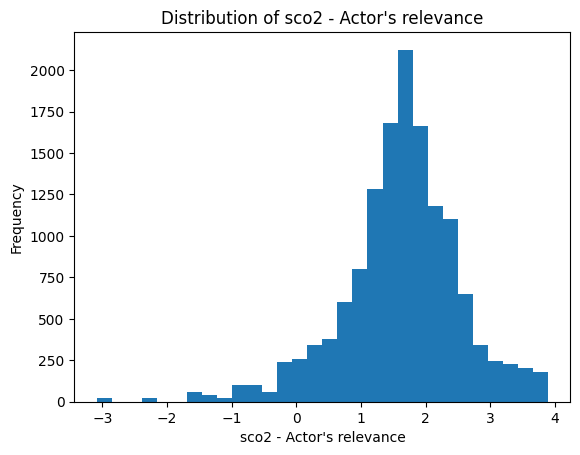

In [10]:
plt.hist(dataset["sco2 - Actor's relevance"], bins=30)
plt.xlabel("sco2 - Actor's relevance")
plt.ylabel('Frequency')
plt.title("Distribution of sco2 - Actor's relevance")
plt.show()

so now after fininshing the preprocessing, we export and start

In [11]:
# export data to NLTK
output_path_alltextdatatoNLTK = "../data/alltextdatatoNLTK.xlsx"
dataset.to_excel(output_path_alltextdatatoNLTK, index=False)
print(f"file written to {output_path_alltextdatatoNLTK}")

file written to ../data/alltextdatatoNLTK.xlsx
